In [1]:
!pip3 uninstall gdown -y && pip3 install gdown && gdown 11JSlHbqtpobYRvoZGKcYCVDdOGhVOJhx

Found existing installation: gdown 5.2.0
Uninstalling gdown-5.2.0:
  Successfully uninstalled gdown-5.2.0
Downloading...
From: https://drive.google.com/uc?id=11JSlHbqtpobYRvoZGKcYCVDdOGhVOJhx
To: /content/Data.csv
100% 75.8M/75.8M [00:01<00:00, 72.2MB/s]


In [2]:
import pandas as pd

df = pd.read_csv("Data.csv").filter(['AR', 'BRCA1', 'BRCA2', 'CD82', 'CDH1', 'CHEK2', 'EHBP1', 'ELAC2', 'EP300', 'EPHB2', 'EZH2', 'FGFR2',
                                     'FGFR4', 'GNMT', 'HNF1B', 'HOXB13', 'IGF2', 'ITGA6', 'KLF6', 'LRP2', 'MAD1L1', 'MED12', 'MSMB', 'MSR1',
                                     'MXI1', 'NBN', 'PCNT', 'PLXNB1', 'PTEN', 'RNASEL', 'SRD5A2', 'STAT3', 'TGFBR1', 'WRN', 'WT1', 'ZFHX3',
                                     'age_at_initial_pathologic_diagnosis', 'gleason_score', 'sample_type_id'], axis = 1)
df

,AR,BRCA1,BRCA2,CD82,CDH1,CHEK2,EHBP1,ELAC2,EP300,EPHB2,...,RNASEL,SRD5A2,STAT3,TGFBR1,WRN,WT1,ZFHX3,age_at_initial_pathologic_diagnosis,gleason_score,sample_type_id
0,6.7176,6.3991,3.6908,8.4317,13.9269,6.2602,9.5166,10.3378,10.6591,6.7892,...,7.6306,7.1394,11.9359,9.4714,6.7736,5.1993,11.0590,67.0,7.0,1.0
1,7.0475,5.4137,3.5319,9.9956,13.7443,6.8292,9.6373,10.5220,10.4883,6.9796,...,7.6634,8.2414,12.2429,10.2816,7.6972,4.1931,10.2621,68.0,7.0,1.0
2,9.8964,6.7317,5.2585,9.7398,14.3431,6.4817,9.6858,10.5934,11.5004,5.4415,...,8.2966,7.4847,12.6056,10.4097,7.8532,1.2514,11.5074,55.0,7.0,1.0
3,7.8546,5.8803,2.7635,9.6325,13.4021,6.6357,9.8722,10.0926,10.4470,5.7466,...,7.9922,8.2110,11.8248,10.0373,7.8725,3.7181,11.0437,57.0,8.0,1.0
4,5.4854,5.6579,3.0695,9.0280,13.8315,6.5415,9.3805,9.7820,10.0845,5.5913,...,7.2775,7.0425,11.8292,9.0926,6.6270,4.8798,10.2371,55.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,8.0205,7.1368,4.3739,10.0739,12.1008,6.9689,9.3358,10.5230,10.6615,8.3478,...,7.6123,7.0407,12.1667,9.5647,7.0980,1.8745,9.9833,64.0,9.0,1.0
546,4.4301,5.9073,1.2180,9.3389,12.5143,6.9192,9.1087,10.9050,8.6589,7.7539,...,8.1639,8.6541,11.6578,10.4724,6.6882,5.4844,10.0939,77.0,6.0,1.0
547,5.6170,6.1832,1.8958,9.0897,12.4732,7.6316,9.1299,10.5703,9.3067,6.6936,...,6.8605,7.0253,11.2576,8.8526,6.3040,5.7199,10.0719,69.0,7.0,1.0
548,5.5462,6.0298,2.6592,10.3554,12.4391,7.1808,8.5355,10.9056,9.1800,7.4325,...,7.7713,6.6877,11.8976,9.0281,6.1097,0.0000,10.0023,67.0,9.0,1.0


In [3]:
print(df.sample_type_id.value_counts())

sample_type_id
1.0    498
0.0     52
Name: count, dtype: int64


**Part 1**

Split Data (80% training and 20% test). Please use stratified split.

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["sample_type_id"])
y = df["sample_type_id"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Train Model

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Visualize the Tree

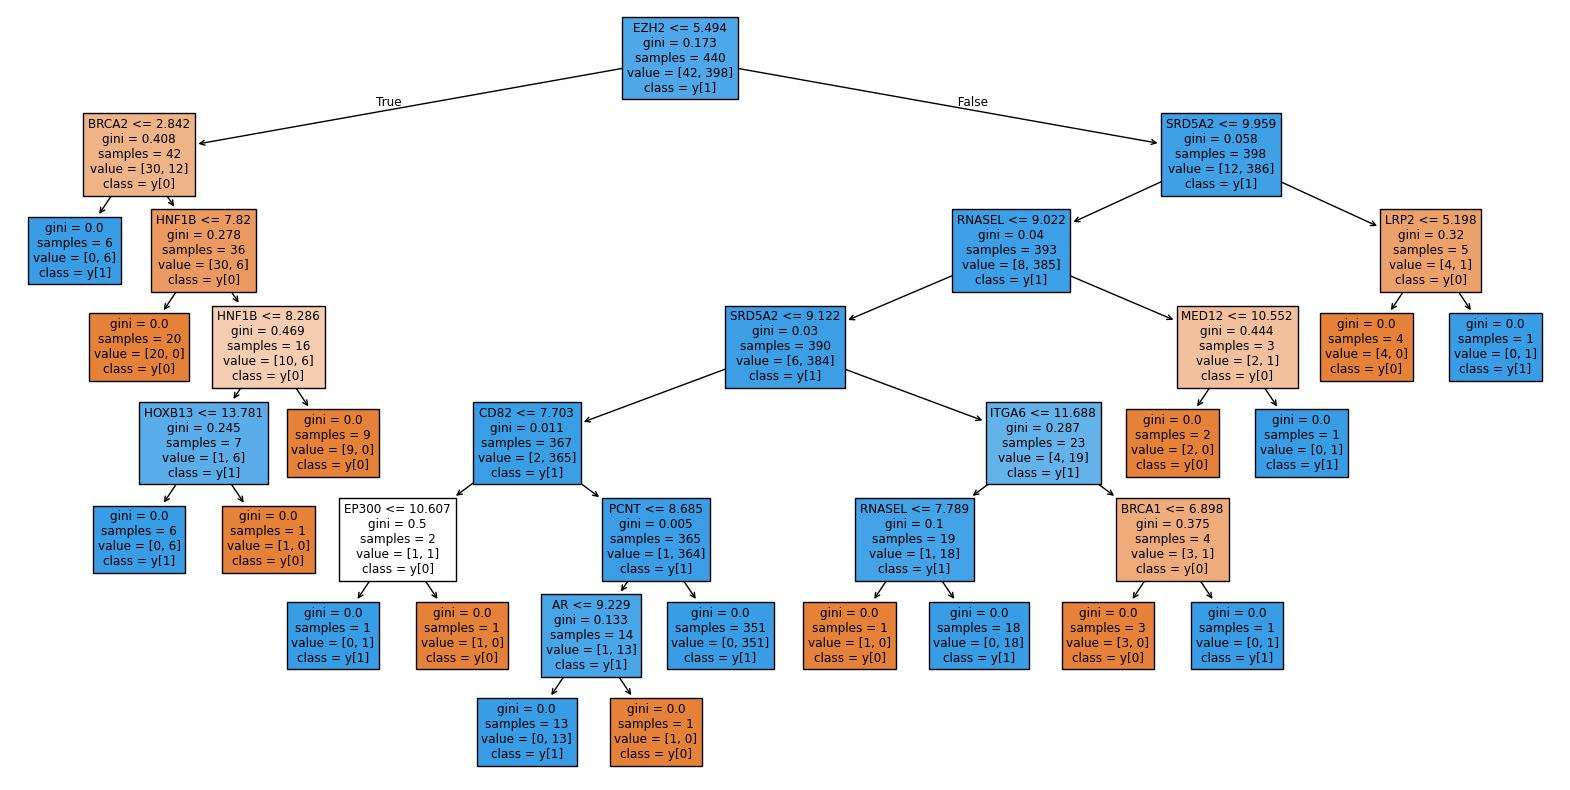

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=True, filled=True)
plt.show()

Evaluate Model

In [10]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9181818181818182


**Part 2**

Data Preprocessing (i.e.,normalization)

Feature Selection (Select top 15 features)

Split Data (80% training and 20% test). Please use stratified split.

Train Model

Visualize the Tree

Model Evaluation

Generate Confusion Matrix and AUC/ROC